# Import libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

import warnings # supress warnings
warnings.filterwarnings('ignore')

# Import dataset csv file

`pd.read_csv()` is use to read csv file and convert into dataframe

`.head()` is show the first five row of the dataset (as default)

In [ ]:
# import labtop dataset
laptop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/Project/Data/test4.csv')
laptop.head()

,No.,Brand,Series,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,1,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/2TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,2,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/1TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,3,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/1TB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,4,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/512GB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,5,Apple,MacBook Pro 14 Silver-16C GPU/16GB/2TB,1.6,31.26,22.12,1.55,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


# Data preprocessing & Create model

`.dropna()` is for drop rows with null value

`.info()` to show the overall information of the dataframe

`.unique()` to show the unique values for that column

In [ ]:
laptop = laptop.dropna()

In [ ]:
laptop = laptop.dropna()

In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No.                   345 non-null    int64  
 1   Brand                 345 non-null    object 
 2   Series                345 non-null    object 
 3   Weight(kg)            345 non-null    float64
 4   Width(cm)             345 non-null    float64
 5   Depth(cm)             345 non-null    float64
 6   Height(cm)            345 non-null    float64
 7   Screen Size(inch)     345 non-null    float64
 8   Display               345 non-null    object 
 9   Resolution            345 non-null    object 
 10  OS                    345 non-null    object 
 11  CPU                   345 non-null    object 
 12  GPU                   345 non-null    object 
 13  RAM(GB)               345 non-null    int64  
 14  Processor Speed(GHz)  345 non-null    float64
 15  Storage(GB)           3

In [ ]:
laptop['Resolution'].unique()

array(['3456x2234', '3024x1964', '2560x1600', '1920x1080', '2560x1440',
       '3840x2160', '3072x1920', '1366x768', '3840x2400', '3456x2160',
       '4096x2160', '1920x1200', '2880x1800', '3000x2000', '2520x1680',
       '2160x1440'], dtype=object)

* **Heatmap**: to visualize the correlation between dataset

`sns.heatmap` is for draw a heatmap
* `.corr()` in `pandas` create a pairwise correlation of columns
* if `annot=True`, the data value is show on the heatmap; in this case is correlation value

When the correlation value is near 0, It's indicate that it have low or no correlation with each other.

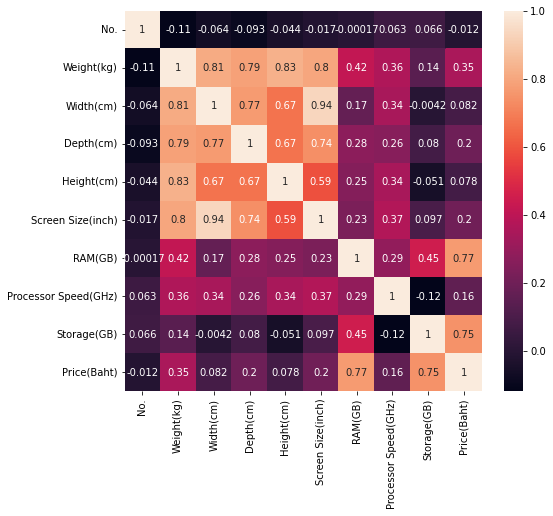

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(laptop.corr(), annot=True, ax=ax)

`.copy()` to copy the laptop dataframe

`.drop()` to drop unused column

In [ ]:
laptop2 = laptop.copy()
laptop2.drop(['No.','Series','Height(cm)'], axis=1, inplace=True)
laptop2.head()

,Brand,Weight(kg),Width(cm),Depth(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,Apple,2.2,35.57,24.81,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,Apple,2.2,35.57,24.81,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,Apple,2.1,35.57,24.81,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,Apple,2.1,35.57,24.81,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,Apple,1.6,31.26,22.12,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


In [ ]:
laptop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 345 non-null    object 
 1   Weight(kg)            345 non-null    float64
 2   Width(cm)             345 non-null    float64
 3   Depth(cm)             345 non-null    float64
 4   Screen Size(inch)     345 non-null    float64
 5   Display               345 non-null    object 
 6   Resolution            345 non-null    object 
 7   OS                    345 non-null    object 
 8   CPU                   345 non-null    object 
 9   GPU                   345 non-null    object 
 10  RAM(GB)               345 non-null    int64  
 11  Processor Speed(GHz)  345 non-null    float64
 12  Storage(GB)           345 non-null    int64  
 13  StorageType           345 non-null    object 
 14  Price(Baht)           345 non-null    int64  
dtypes: float64(5), int64(3)

`.map` is map object result after apply the function; In this case we create a dict to change substitute the resolution into a number

`.apply` is to apply the funtion into the dataframe

In [ ]:
def resmap(x):
    return x.map({'1366x768': 0, '1920x1080': 1, '1920x1200': 2, '2160x1440': 3, '2520x1680': 4,
                  '2560x1440': 5, '2560x1600': 6, '2880x1800': 7, '3000x2000': 8, '3024x1964': 9,
                  '3072x1920': 10, '3456x2160': 11, '3456x2234': 12, '3840x2160': 13, '3840x2400': 14,
                  '4096x2160': 15})

laptop2[['Resolution']] = laptop2[['Resolution']].apply(resmap)
laptop2.head()

,Brand,Weight(kg),Width(cm),Depth(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,Apple,2.2,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,Apple,2.2,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,Apple,2.1,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,Apple,2.1,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,Apple,1.6,31.26,22.12,14.2,IPS,9,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


In [ ]:
def sttmap(x):
    return x.map({'HDD': 0, 'eMMC': 1, 'SSD': 2})

laptop2[['StorageType']] = laptop2[['StorageType']].apply(sttmap)
laptop2.head()

,Brand,Weight(kg),Width(cm),Depth(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,Apple,2.2,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,2,138900
1,Apple,2.2,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,2,124900
2,Apple,2.1,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,2,96900
3,Apple,2.1,35.57,24.81,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,2,89900
4,Apple,1.6,31.26,22.12,14.2,IPS,9,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,2,103900


`!pip` for install the python package; in this case is **category_encoders**

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
laptop3 = laptop2.copy()
laptop3.drop(['Width(cm)', 'Depth(cm)', 'CPU', 'Display', 'Brand'], axis = 1, inplace = True)
laptop3.head()

,Weight(kg),Screen Size(inch),Resolution,OS,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,2.2,16.2,12,macOS,Apple M1 Max 32-Core GPU,32,4.0,2000,2,138900
1,2.2,16.2,12,macOS,Apple M1 Max 32-Core GPU,32,4.0,1000,2,124900
2,2.1,16.2,12,macOS,Apple M1 Pro 16-Core GPU,16,3.4,1000,2,96900
3,2.1,16.2,12,macOS,Apple M1 Pro 16-Core GPU,16,3.4,512,2,89900
4,1.6,14.2,9,macOS,Apple M1 Pro 16-Core GPU,16,3.4,2000,2,103900


`ce.OneHotEncoder` is function similar with function `pd.get_dummies` in pandas.

It use for categorical features but we don't have to use `.concat` and `.drop` to merge new data into dataset like `.get_dummies`. It will automatically delete old columns and add new columns into dataset with 0 and 1.

`use_cat_names=True` is for encoded the features columns name with in the new generated columns

In [ ]:
encoder = ce.OneHotEncoder(use_cat_names=True)

Split the test and train dataset

* X is included all features **except Price(baht)**
* y is have only one columns which is **Price(baht)**

`train_test_split` is function in sklearn use for seperate the dataset into test and train data

`test_size` is the proportion of the dataset we seperate for test the model

`random_state` is for have the same result of split the test and train data everytime we run the program

In [ ]:
X = laptop3.drop('Price(Baht)', axis=1)
y = laptop3['Price(Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

`.fit_transform` for train data

`.transform` for test data

this because we don't want information from the test data to bias the model.

In [ ]:
X_train2 = encoder.fit_transform(X_train)
X_test2 = encoder.transform(X_test)

`max_depth` is maximum depth of tree

`min_impurity_decrease` is minimum number to indicate the growing of tree. If split can not decrease impurify more than the set data this will cause the tree to stops growing, because this means nodes will not be purer.

`min_samples_split` is minimum number of samples required to split the node; in this case if the node contain less than 10 samples. it will be the last node and stop split further more.

`n_estimators` is number of trees in the forest

In [ ]:
rf = RandomForestRegressor(max_depth=19, min_impurity_decrease=0.05, min_samples_split=3, n_estimators=105, random_state=44)
rf.fit(X_train2, y_train)

RandomForestRegressor(max_depth=19, min_impurity_decrease=0.05,
                      min_samples_split=3, n_estimators=105, random_state=44)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.05,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 105,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 44,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# max_depth = [int(x) for x in np.linspace(1, 25, num = 25)]
# max_depth.append(None)

# random_grid = {'bootstrap': [True, False],
#                'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 51)],
#                'max_depth': max_depth,
#                'min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
#                'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
#                'min_impurity_decrease': [0, 0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.4]}
# print(random_grid)

In [ ]:
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf,
#                                param_distributions = random_grid,
#                                verbose=2, 
#                                random_state=44)
# rf_random.fit(X_train2, y_train)

In [ ]:
# rf_random.best_params_

In [ ]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [16,17,18,19,20,None],
#     'min_impurity_decrease': [0.025, 0.05, 0.1, 0.125, 0.15],
#     'min_samples_leaf': [1],
#     'min_samples_split': [2,3,4,5],
#     'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 150, num = 51)]
# }

# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator = rf,
#                            param_grid = param_grid,
#                            scoring= 'r2',
#                            verbose = 3,
#                            return_train_score=True)
# grid_search.fit(X_train2, y_train)

In [ ]:
# grid_search.best_params_

# Score testing

*   MAE (mean absolute error)
*   RMSE (Root mean squared error)
*   R2 ( R-Square)

In [ ]:
y_pred = rf.predict(X_test2)

In [ ]:
y_test-y_pred

258    -3016.648299
319     1997.208617
335    -9882.193651
337    14380.115873
301   -10425.606349
           ...     
291     -957.944444
333    -2269.084127
63      2118.809524
50    -11219.565079
155   -28353.077778
Name: Price(Baht), Length: 104, dtype: float64

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

6419.1492743764165

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

9381.113152180254

In [ ]:
# r2 = r2_score(y_test, y_pred)

In [ ]:
r2 = cross_val_score(rf, X_test2, y_test, scoring='r2', cv=5)
r2 = r2.mean()

In [ ]:
print(dict(zip(X.columns,rf.feature_importances_.round(6))))

{'Weight(kg)': 0.044626, 'Screen Size(inch)': 0.014476, 'Resolution': 0.294449, 'OS': 0.003418, 'GPU': 0.005181, 'RAM(GB)': 0.001247, 'Processor Speed(GHz)': 0.001662, 'Storage(GB)': 2e-06, 'StorageType': 0.0}


Check R-square score for train dataset.

this is to compare the score for train and test dataset to check if the model is overfitting or underfitting.

In [ ]:
y_predtr = rf.predict(X_train2)

In [ ]:
# r2tr = r2_score(y_train, y_predtr)

In [ ]:
r2tr = cross_val_score(rf, X_train2, y_train, scoring='r2', cv=5)
r2tr = r2tr.mean()

In [ ]:
print('Performance score of test set: ' + str(r2))
print('Performance score of train set: ' + str(r2tr))
print('Overfitting?: ' + str(r2tr-r2))

Performance score of test set: 0.7267219108511892
Performance score of train set: 0.8397272268269298
Overfitting?: 0.1130053159757406


# K fold

In [ ]:
len(X_train2.columns)

42

`KFold` is fuction in sklearn to split data into train and test.
*   each fold is used as a test data while the remaining folds used as a train data.

> `n_splits` is the number of folds; in this case is 5


---


`RFE` (Recursive Feature Elimination) is wrapper method. It a type of backward selection method but it assign weights to features as well.

---


`GridSearchCV` is use to get the mean of train and test score for different train and test data.

> `estimator` we use rfe to select the best set of feature for each different number of features to select.

> `param_grid` listd of parameter settings; in this case we change only number of features to select in model.

> `scoring` use r2 method to calculate the score.

> `cv` determines the splitting strategy.

> `verbose` use to control how much the message result will appear.

> `return_train_score` to indicate that should it return the training score or not.

In [ ]:
# #folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# hyper_params = [{'n_features_to_select': list(range(1, 43))}]
# rfe = RFE(rf)             

# model_cv = GridSearchCV(estimator = rfe, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         #cv = folds, 
#                         verbose = 3,
#                         return_train_score=True)      

# model_cv.fit(X_train2, y_train)

In [ ]:
# cv_results = pd.DataFrame(model_cv.cv_results_)

<h3> Plotting the cv results

`plt.figure` to create a new figure (figsize=(W,H))

`plt.plot` to plot(x,y)

`plt.xlabel` to set x-axis label

`plt.ylabel` to set y-axis label

`plt.title` to set the title of the graph

`plt.legend` generate graph legend of each line on graph with `loc` to specify the location to place.

In [ ]:
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('r-squared score')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

# Test

```
def resmap(x):
    return x.map({'1366x768': 0, '1920x1080': 1, '1920x1200': 2, '2160x1440': 3, '2520x1680': 4,
                  '2560x1440': 5, '2560x1600': 6, '2880x1800': 7, '3000x2000': 8, '3024x1964': 9,
                  '3072x1920': 10, '3456x2160': 11, '3456x2234': 12, '3840x2160': 13, '3840x2400': 14,
                  '4096x2160': 15})

def sttmap(x):
    return x.map({'HDD': 0, 'eMMC': 1, 'SSD': 2})
```

In [ ]:
laptop2['GPU'].unique()

array(['Apple M1 Max 32-Core GPU', 'Apple M1 Pro 16-Core GPU',
       'Apple M1 Pro 14-Core GPU', 'Apple M1 8-Core GPU',
       'Apple M1 7-Core GPU', 'Intel Iris Xe Graphics',
       'NVIDIA GeForce GTX 1650', 'AMD Radeon Graphics',
       'NVIDIA GeForce MX330', 'NVIDIA GeForce RTX 3050',
       'Intel UHD Graphics', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3080', 'NVIDIA RTX A3000',
       'NVIDIA GeForce MX350', 'NVIDIA Quadro RTX 3000',
       'NVIDIA GeForce RTX Super', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce MX150', 'NVIDIA GeForce RTX 2070',
       'NVIDIA GeForce GTX 1660', 'NVIDIA GeForce MX250',
       'NVIDIA GeForce MX230', 'NVIDIA GeForce RTX 2060',
       'NVIDIA GeForce RTX2070', 'NVIDIA GeForce RTX SUPER',
       'NVIDIA GeForce GTX 3060', 'NVIDIA T600', 'NVIDIA GeForce MX450'],
      dtype=object)

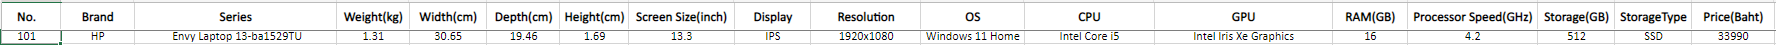

In [ ]:
LT = pd.DataFrame([{
                    'Weight(kg)': 1.31,
                    'Screen Size(inch)': 13.3,
                    'Resolution': 1,
                    'OS': 'Windows 11 Home',
                    'GPU': 'Intel Iris Xe Graphics',
                    'RAM(GB)': 16,
                    'Processor Speed(GHz)': 4.2,
                    'Storage(GB)': 512,
                    'StorageType': 2
                   }
])

X_custom = LT[['Weight(kg)',
               'Screen Size(inch)',
               'Resolution',
               'OS',
               'GPU',
               'RAM(GB)',
               'Processor Speed(GHz)',
               'Storage(GB)',
               'StorageType']]
X_custom = encoder.transform(X_custom)

y_predd = rf.predict(X_custom)
print('Price: 33990 baht\n' + 'Predicted Price: %d baht\n' %y_predd + 'Different: %d baht' %abs(33990-y_predd))

Price: 33990 baht
Predicted Price: 40444 baht
Different: 6454 baht


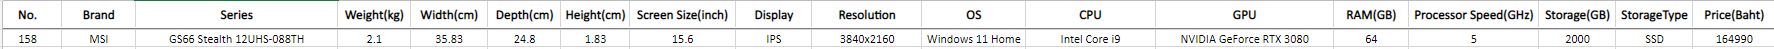

In [ ]:
LT = pd.DataFrame([{
                    'Weight(kg)': 2.1,
                    'Screen Size(inch)': 15.6,
                    'Resolution': 13,
                    'OS': 'Windows 11 Home',
                    'GPU': 'NVIDIA GeForce RTX 3080',
                    'RAM(GB)': 64,
                    'Processor Speed(GHz)': 5,
                    'Storage(GB)': 2000,
                    'StorageType': 2
                   }
])

X_custom = LT[['Weight(kg)',
               'Screen Size(inch)',
               'Resolution',
               'OS',
               'GPU',
               'RAM(GB)',
               'Processor Speed(GHz)',
               'Storage(GB)',
               'StorageType']]
X_custom = encoder.transform(X_custom)

y_predd = rf.predict(X_custom)
print('Price: 164990 baht\n' + 'Predicted Price: %d baht\n' %y_predd + 'Different: %d baht' %abs(164990-y_predd))

Price: 164990 baht
Predicted Price: 150659 baht
Different: 14330 baht


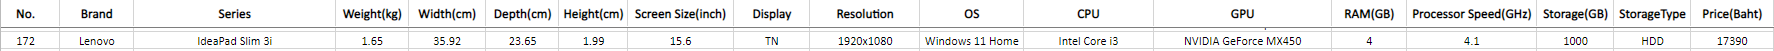

In [ ]:
LT = pd.DataFrame([{
                    'Weight(kg)': 1.65,
                    'Screen Size(inch)': 15.6,
                    'Resolution': 1,
                    'OS': 'Windows 11 Home',
                    'GPU': 'NVIDIA GeForce MX450',
                    'RAM(GB)': 4,
                    'Processor Speed(GHz)': 4.1,
                    'Storage(GB)': 1000,
                    'StorageType': 0
                   }
])

X_custom = LT[['Weight(kg)',
               'Screen Size(inch)',
               'Resolution',
               'OS',
               'GPU',
               'RAM(GB)',
               'Processor Speed(GHz)',
               'Storage(GB)',
               'StorageType']]
X_custom = encoder.transform(X_custom)

y_predd = rf.predict(X_custom)
print('Price: 17390 baht\n' + 'Predicted Price: %d baht\n' %y_predd + 'Different: %d baht' %abs(17390-y_predd))

Price: 17390 baht
Predicted Price: 32354 baht
Different: 14964 baht


In [ ]:
LT = pd.DataFrame([{
                    'Weight(kg)': 1.39,
                    'Screen Size(inch)': 14,
                    'Resolution': 1,
                    'OS': 'Windows 11 Home',
                    'GPU': 'NVIDIA GeForce RTX 3050',
                    'RAM(GB)': 16,
                    'Processor Speed(GHz)': 4.4,
                    'Storage(GB)': 512,
                    'StorageType': 2
                   }
])

X_custom = LT[['Weight(kg)',
               'Screen Size(inch)',
               'Resolution',
               'OS',
               'GPU',
               'RAM(GB)',
               'Processor Speed(GHz)',
               'Storage(GB)',
               'StorageType']]
X_custom = encoder.transform(X_custom)

y_predd = rf.predict(X_custom)
print('Price: 33990 baht\n' + 'Predicted Price: %d baht\n' %y_predd + 'Different: %d baht' %abs(33990-y_predd))

Price: 33990 baht
Predicted Price: 37214 baht
Different: 3224 baht


# Graph

<h3> Plotting compare between actual vs predicted price

*   Create dataframe by concat the train and test data
*   Seperate between actual price and predicted price into each column


In [ ]:
actual = np.concatenate((y_test, y_train), axis=None)
predict = np.concatenate((y_pred, y_predtr), axis=None)
pricedf = pd.DataFrame(data = ([actual, predict]), index = ['actual', 'predict']).transpose()

In [ ]:
pricedf

,actual,predict
0,117900.0,120916.648299
1,42490.0,40492.791383
2,64990.0,74872.193651
3,56990.0,42609.884127
4,38326.0,48751.606349
...,...,...
340,107990.0,88832.468254
341,159990.0,150917.068254
342,30190.0,29563.317460
343,54000.0,51518.504762


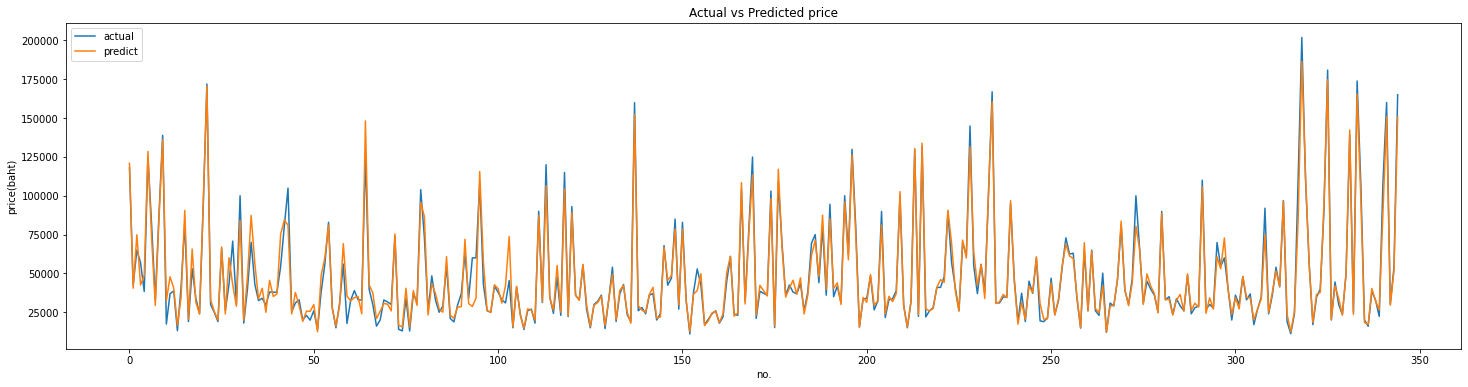

In [ ]:
plt.figure(figsize=(25,6))

plt.plot(pricedf['actual'])
plt.plot(pricedf['predict']) #, linestyle='dashdot'
plt.xlabel('no.')
plt.ylabel('price(baht)')
plt.title('Actual vs Predicted price')
plt.legend(['actual', 'predict'], loc='upper left')

<h3> Plotting 5 kfold r2-score on different data size

In [ ]:
X_kf = pd.concat([X_train2, X_test2], axis=0)
y_kf = pd.concat([y_train, y_test], axis=0)
laptop4 = pd.concat([X_kf,y_kf], axis=1)

In [ ]:
score = []
for i in range(100,346,5):
  df = laptop4.sample(i, random_state=90)
  X = df.drop('Price(Baht)', axis=1)
  y = df['Price(Baht)']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  rscore = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5).mean()
  score.append(rscore)

In [ ]:
scoredf = pd.DataFrame(data = ([score]), index = ['score'], columns = list(range(100, 346, 5))).transpose()

Text(0.5, 1.0, 'Score vs Data size')

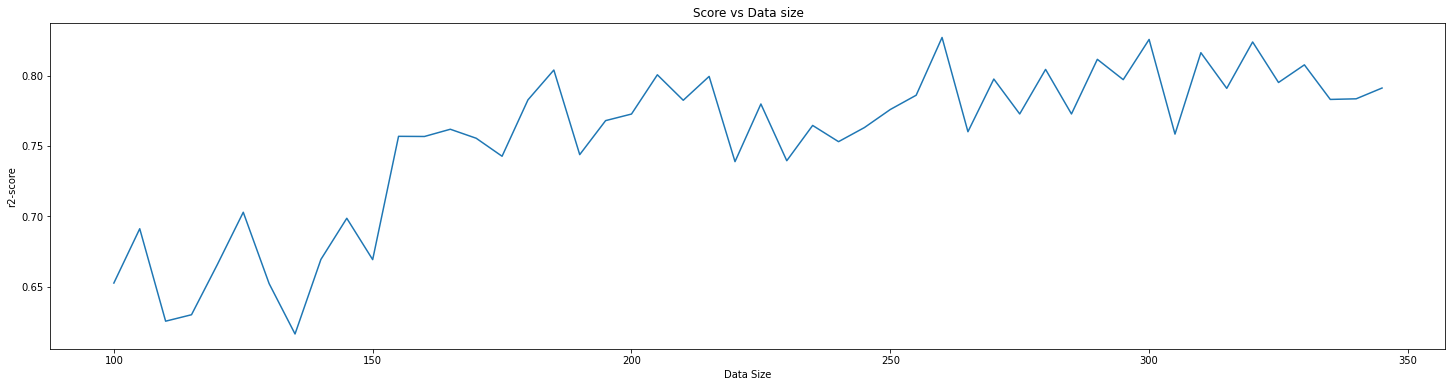

In [ ]:
plt.figure(figsize=(25,6))

plt.plot(scoredf['score'])
plt.xlabel('Data Size')
plt.ylabel('r2-score')
plt.title('Score vs Data size')